In [185]:
%cd Projects/Data-Science/UnsupervisedHunting/

[Errno 2] No such file or directory: 'Projects/Data-Science/UnsupervisedHunting/'
/home/ppc/Projects/Data-Science/UnsupervisedHunting


In [173]:
!pip install scapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 2.6 MB/s eta 0:00:002.7 MB/s eta 0:00:01


In [182]:
import pandas as pd
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
import os
from sklearn.cluster import KMeans
from scapy.all import *



random.seed(1234)

### Fake Data
- 8 characters that iterate through the alphabet, equal distribution
- Some random feature extraction

In [158]:
alphabet = "ABCDEFG"
rows = []

def prod(l):
     yield from itertools.product(*([l] * 4)) 

col = [''.join(x) for x in prod(alphabet)]

for x in col:
    for i in range(random.randint(0, 3)):
        if random.randint(0, 10) <= 5: 
            x += random.choice(alphabet)

    if random.randint(0, 100) < 2:
        x += ";"
        x = list(x)
        random.shuffle(x)
        x = ''.join(x)
    
    row = {
        "data":x,
        "types":len(set(x)),
        "value":sum([ord(chr) for chr in x]) + random.randint(100, 1000) if ";" not in x else random.randint(3000, 4000),
        "fpl_value":ord(x[0]) + ord(x[-1]) + random.randint(100, 1000) if ";" not in x else random.randint(3000, 8000),
        "l2_value":ord(x[-1]) + ord(x[-2]) + random.randint(100, 1000) if ";" not in x else random.randint(3000, 4000),
        "f2_value":ord(x[0]) + ord(x[1]) + random.randint(100, 1000) if ";" not in x else random.randint(3000, 4000),
        "cx_value":ord(x[0]) * 5 + ord(x[1]) * 10 - ord(x[2]) * 30 + ord(x[3]) * 140
    }
    
    for a in alphabet + ''.join([";"]):
        row["count_{}".format(a)] = x.count(a)
    
    
    rows.append(row)
df = pd.DataFrame(rows)

In [159]:
df

,data,types,value,fpl_value,l2_value,f2_value,cx_value,count_A,count_B,count_C,count_D,count_E,count_F,count_G,count_;
0,AAAACA,2,1191,592,885,324,8125,5,0,1,0,0,0,0,0
1,AAAB,2,1055,241,728,588,8265,3,1,0,0,0,0,0,0
2,AAACB,3,888,665,459,1061,8405,3,1,1,0,0,0,0,0
3,AAAD,2,1039,375,648,322,8545,3,0,0,1,0,0,0,0
4,AAAEF,3,888,968,626,716,8685,3,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,GGGC,2,1104,898,1102,1002,8315,0,0,1,0,0,0,3,0
2397,GGGDA,3,1218,1039,964,1140,8455,1,0,0,1,0,0,3,0
2398,GGGEE,2,578,1039,455,875,8595,0,0,0,0,2,0,3,0
2399,GGGFD,3,1126,922,953,501,8735,0,0,0,1,0,1,3,0


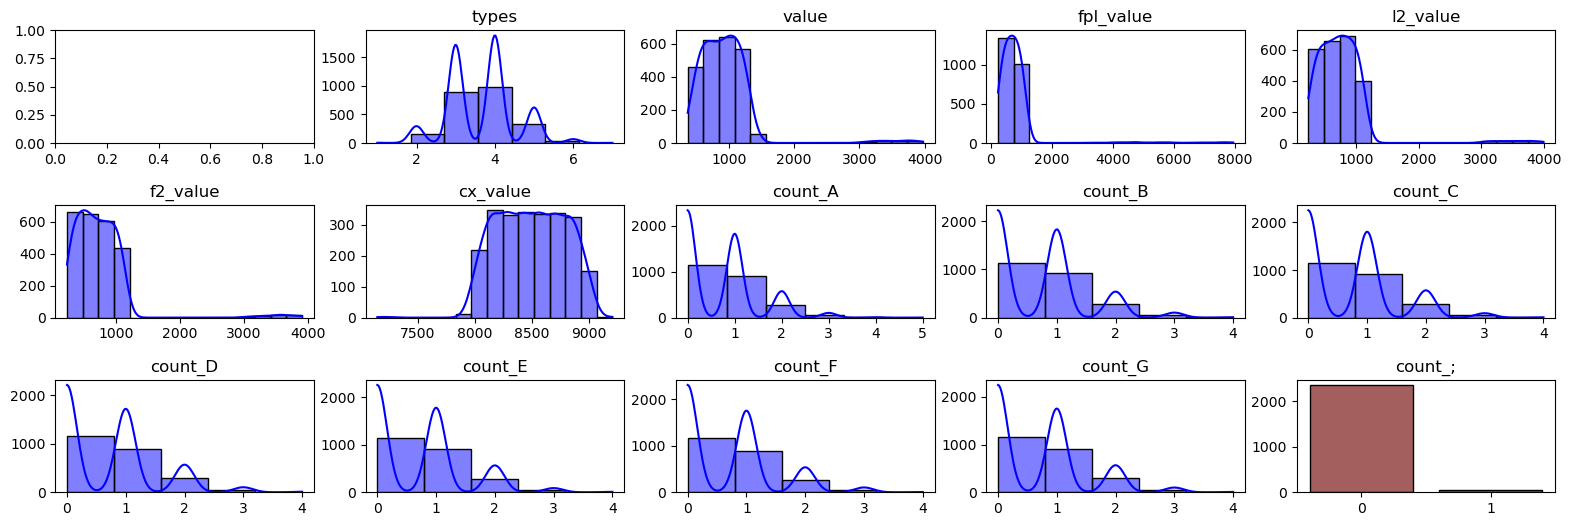

In [160]:

def data_viz(df):
    blacklist = ["data"]
    fig = plt.figure(figsize=(8,6))
    gs = gridspec.GridSpec(3, 5, right=2, hspace=0.55)
    axs = []
    for y in range(3):
        for x in range(5):
            ax = fig.add_subplot(gs[y, x])
            axs.append(ax)
            col = df.columns[((y*5) + x) % len(df.columns)]
            if col in blacklist: continue
            if len(df[ col ].value_counts()) == 2:
                g = sns.barplot(x=[0, 1], y=[ len(df[df[col] == 0]), len(df[df[col] == 1])], color="#AF5252", ax=ax,edgecolor="0")
            else:
                bins = len(df[col].unique())
                if bins > 15: bins = 15
                g = sns.histplot(df[ col ], kde=True, bins=bins, color='blue', ax=ax)
            g.set(ylabel=None, xlabel=None)
            g.set_title(col)
    plt.show()

data_viz(df)

### Unsupervised learning

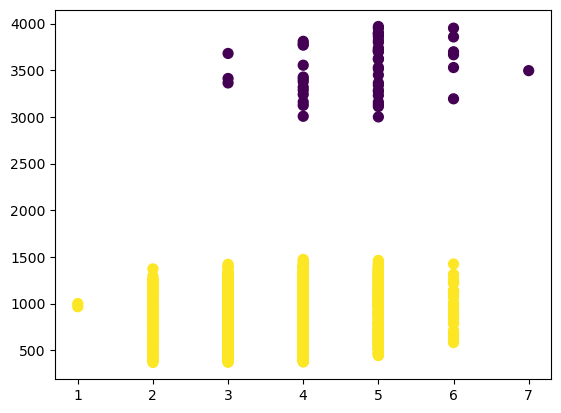

In [168]:
kmeans = KMeans(n_clusters = 2)

X = df[["types", "value"]].to_numpy()

kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s = 50);

In [191]:
data = "random_dns_data.pcapng"
a = rdpcap(data)

#os.system("tshark -r Eavesdrop_Data.pcap -Y http -w Eavesdrop_Data_http.pcap")
sessions = a.sessions()
i = 1
print(len(sessions))
for session in sessions:
    http_payload = ""
    for packet in sessions[session]:
        print(ls(packet))
        print("\n\n===")
        break
        # try:
        #     if packet[TCP].dport == 80 or packet[TCP].sport == 80:
        #         print(packet[TCP].payload)
        # except:
        #     pass

740
dst        : DestMACField                        = '78:45:58:86:9b:5b' ('None')
src        : SourceMACField                      = 'a0:e7:0b:be:97:72' ('None')
type       : XShortEnumField                     = 2048            ('36864')
--
version    : BitField  (4 bits)                  = 4               ('4')
ihl        : BitField  (4 bits)                  = 5               ('None')
tos        : XByteField                          = 0               ('0')
len        : ShortField                          = 71              ('None')
id         : ShortField                          = 34189           ('1')
flags      : FlagsField                          = <Flag 2 (DF)>   ('<Flag 0 ()>')
frag       : BitField  (13 bits)                 = 0               ('0')
ttl        : ByteField                           = 64              ('64')
proto      : ByteEnumField                       = 17              ('0')
chksum     : XShortField                         = 12146           ('None')
src   